All the packages that will be used on this dataset are imported.

In [24]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import random
import datetime
%matplotlib inline

# Cleaning

The data we are using comes from three files: airlines.csv, airports.csv, and flights.csv. The file airlines.csv identifies each airline in the dataset with a two-letter acronym corresponding to the airline variable in flights.csv. The file airports.csv includes information on each airport referenced in flights.csv, including the airport name and the airport's location. Flights.csv is the main dataset we will be using. It contains 31 variables and has 5,819,079 entries with data about all the flights in 2015. The data files were obtained from __[Kaggle](https://www.kaggle.com/usdot/flight-delays/data)__.

In [88]:
airlines = pd.read_csv('airlines.csv' , low_memory=False)
airports = pd.read_csv('airports.csv' , low_memory=False)
flights = pd.read_csv('flights.csv' , low_memory=False)

We have decided to use only a subset of the data from the flights dataset, because of the large number of entries. We will be focusing on the following airlines: United Air Lines Inc., American Airlines Inc., Frontier Airlines Inc., JetBlue Airways, Skywest Airlines Inc. Alaska Airlines Inc., Spirit Air Lines, Southwest Airlines Co., and Delta Air Lines Inc.

The three date variables YEAR, MONTH, and DAY from the flights dataset are consolidated into a single datetime variable, DATE.

In [89]:
includedAirports = ["ATL","LAX","ORD","DFW","JFK","DEN","SFO","LAS","CLT","SEA","PHX","MIA","MCO",
                    "IAH","EWR","MSP","BOS","DTW","PHL","LGA","FLL","BWI","DCA","SLC","MDW"]
flights = flights[flights['ORIGIN_AIRPORT'].isin(includedAirports)]
flights = flights[flights['DESTINATION_AIRPORT'].isin(includedAirports)]

In [90]:
excludedAirlines = ["VX","MQ","HA","EV","US"]
flights = flights[~flights['AIRLINE'].isin(excludedAirlines)]

flights['DATE'] = pd.to_datetime(flights[['YEAR','MONTH', 'DAY']])

In [96]:
airports = airports[airports.IATA_CODE.isin(includedAirports)]

In [99]:
airlines = airlines[~airlines.IATA_CODE.isin(excludedAirlines)]

In [91]:
variables_to_remove = ['TAXI_OUT', 'TAXI_IN', 'WHEELS_ON', 'WHEELS_OFF', 'YEAR', 
                       'TAIL_NUMBER', 'FLIGHT_NUMBER']
flights.drop(variables_to_remove, axis = 1, inplace = True)

In [100]:
random.seed(1313)
train_flights, test_flights = train_test_split(flights,test_size=0.2)

In [102]:
train_flights.to_csv('train_flights.csv', sep='\t')
test_flights.to_csv('test_flights.csv', sep='\t')
airlines.to_csv('cln_airlines.csv', sep='\t')
airports.to_csv('cln_airports.csv', sep='\t')

The function format_hour(), defined below, converts a string to a datetime variable, which is much more convenient to work with.

# Function that converts the 'HHMM' string to datetime.time
def format_hour(nums):
    if pd.isnull(nums):
        return np.nan
    else:
        if nums == 2400: nums = 0
        nums = "{0:04d}".format(int(nums))
        hour = datetime.time(int(nums[0:2]), int(nums[2:4]))
        return hour

The function format_hour() is called on by three time variables in the flights dataset: DEPARTURE_TIME, SCHEDULED_ARRIVAL, and ARRIVAL_TIME. Now the date and time variables are all datetime objects.

flights['DEPARTURE_TIME'] = flights['DEPARTURE_TIME'].apply(format_hour)
flights['SCHEDULED_ARRIVAL'] = flights['SCHEDULED_ARRIVAL'].apply(format_hour)
flights['ARRIVAL_TIME'] = flights['ARRIVAL_TIME'].apply(format_hour)

flights.loc[:5, ['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'DEPARTURE_TIME',
             'ARRIVAL_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']]

The YEAR, MONTH, and DAY variables are removed form the flights dataset as they are no longer needed due to the new DATE variable. The following variables are also removed from the flights dataset because they do not provide any information that would help answer our questions of interest: TAXI_OUT, TAXI_IN, WHEELS_ON, WHEELS_OFF, and DIVERTED.

The flights data is split into training and test data. We have set a random seed to ensure reproducibility.

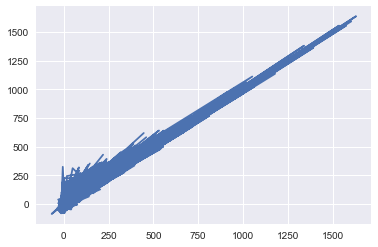

In [92]:
sns.set()
plt.plot(flights.DEPARTURE_DELAY, flights.ARRIVAL_DELAY)
#sns.heatmap(flights)

(0, 2000)

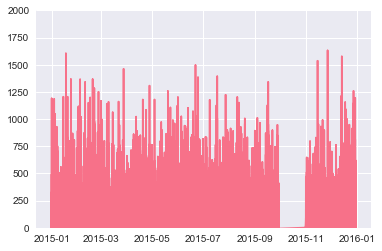

In [93]:
sns.set_palette('husl')
#plt.hist(flights[flights.CANCELLED == 1].DAY_OF_WEEK, bins=[1,2,3,4,5,6,7])
plt.plot(flights[~np.isnan(flights.DEPARTURE_DELAY)].DATE, flights[~np.isnan(flights.DEPARTURE_DELAY)].DEPARTURE_DELAY)
plt.ylim((0,2000))